# Самостоятельное задание.

### Создать ноутбук, в котором выполнить решение вычислительной задачи (например, задачи из области физики, экономики, математики, статистики и т. д.) требующей построения трехмерного графика, условие которой предварительно необходимо согласовать с преподавателем.

#### Условие:
У вас есть функция $$ f(x,y) = sin(x) * cos(y)$$ для значений $x$ и $y$ в диапазоне от $ -\pi $ до $ \pi $. Требуется построить трехмерный график этой функции.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

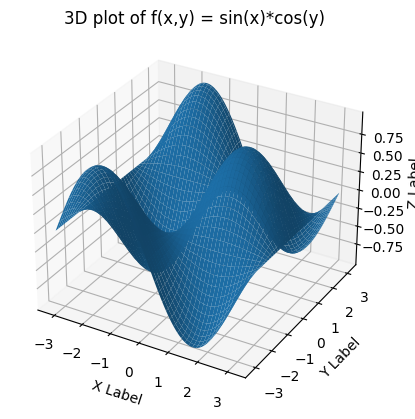

In [2]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)
X, Y = np.meshgrid(x, y)

Z = np.sin(X) * np.cos(Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D plot of f(x,y) = sin(x)*cos(y)')

plt.show()

Данный трехмерный график показывает трехмерную поверхность, соответствующую функции f(x,y).